# Titanic Survival Prediction — Portfolio Version
### Author: Lizzie | Data Science, Machine Learning, Feature Engineering

This notebook demonstrates a full machine-learning workflow for the Titanic survival prediction task.
The purpose is not only to achieve a competitive Kaggle score, but to showcase a clean, structured, and reproducible ML pipeline, including:

Exploratory Data Analysis (EDA)

Feature Engineering (Title, FamilySize, Cabin Group, etc.)

Model Comparison (Logistic Regression, Random Forest, XGBoost)

Performance Evaluation (Accuracy, AUC, ROC)

Kaggle submission generation

This notebook is designed as a portfolio-quality project for data science job applications.

In [1]:
# =========================================
# 1. Load Libraries
# =========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


# =========================================
# 2. Load Data
# =========================================
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)


# =========================================
# 3. Basic Overview
# =========================================
display(train.head())
display(train.describe())
display(train.isnull().sum())
train.info()



Train Shape: (891, 12)
Test Shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


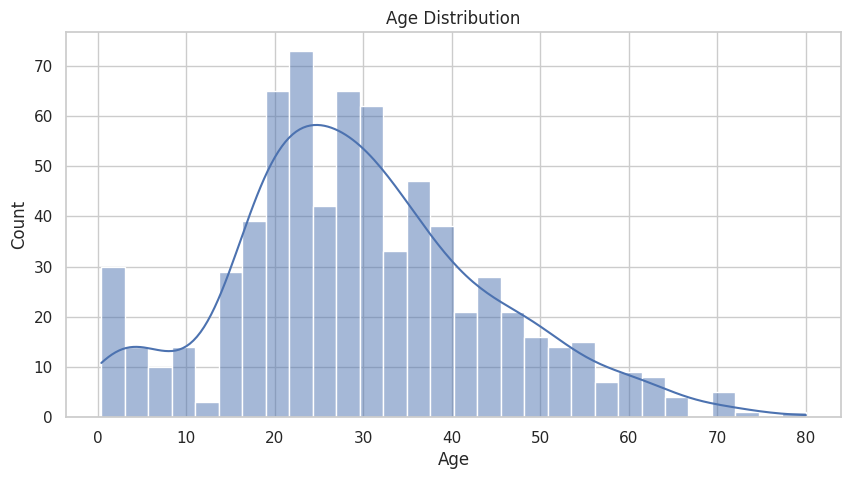

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


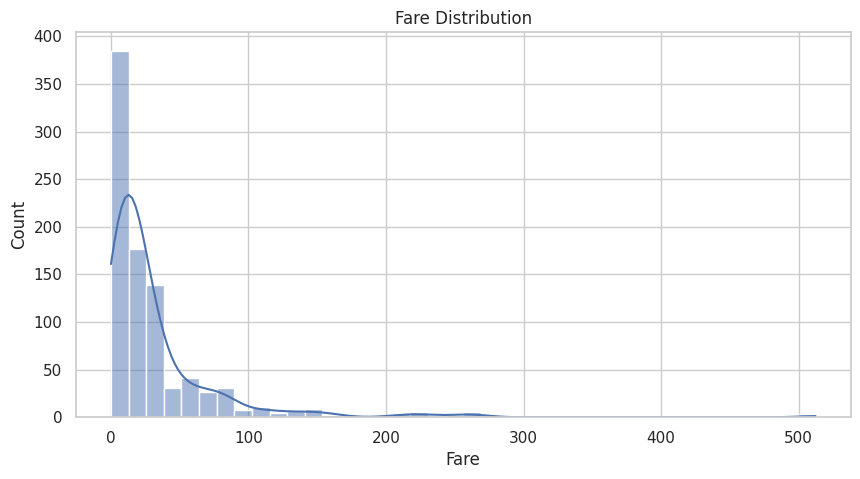

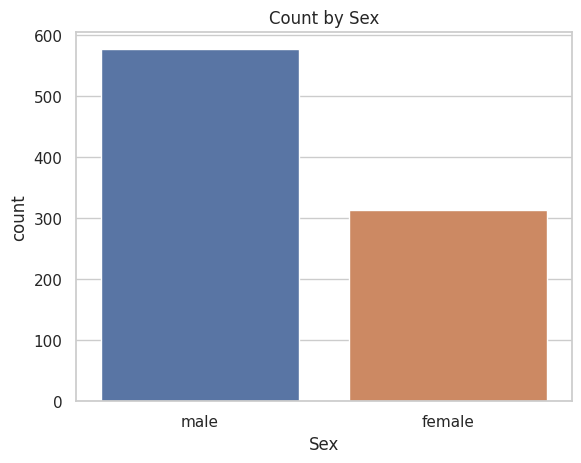

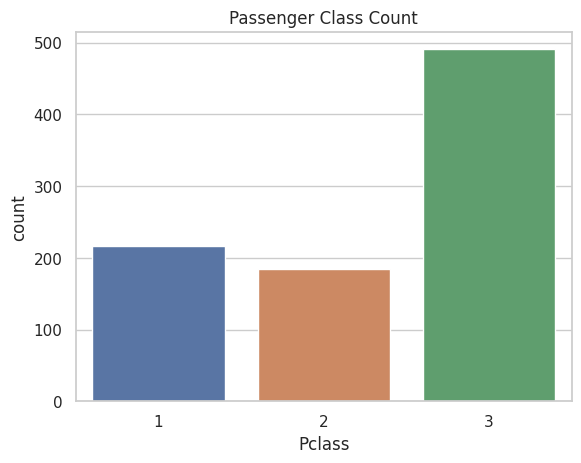

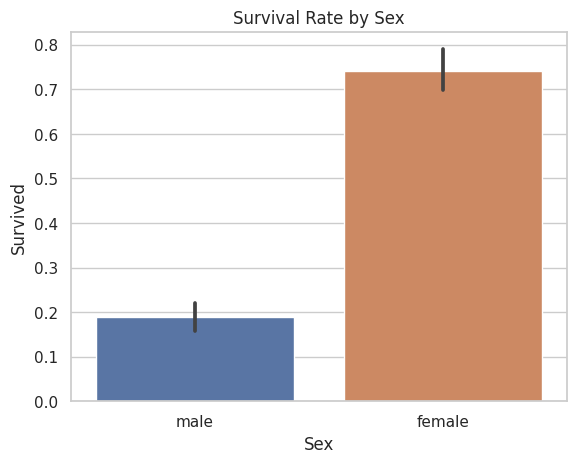

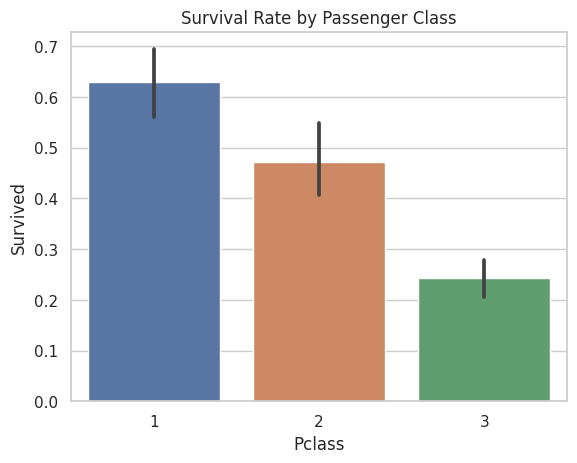

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


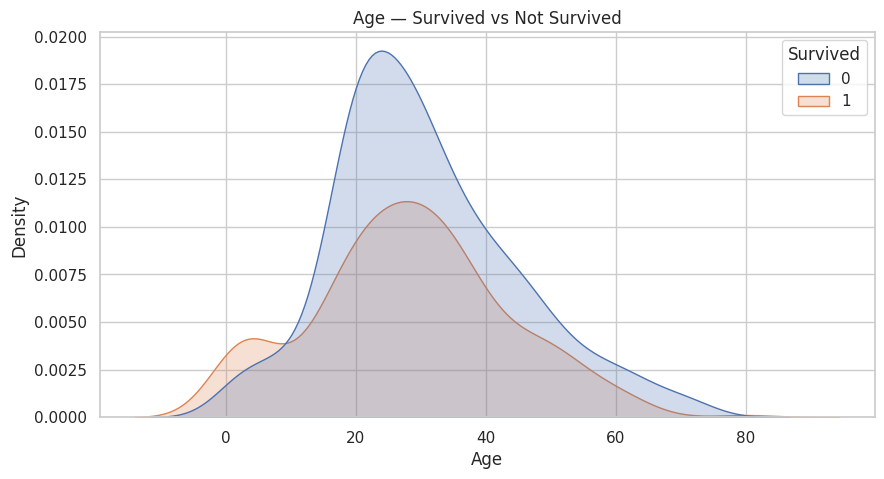

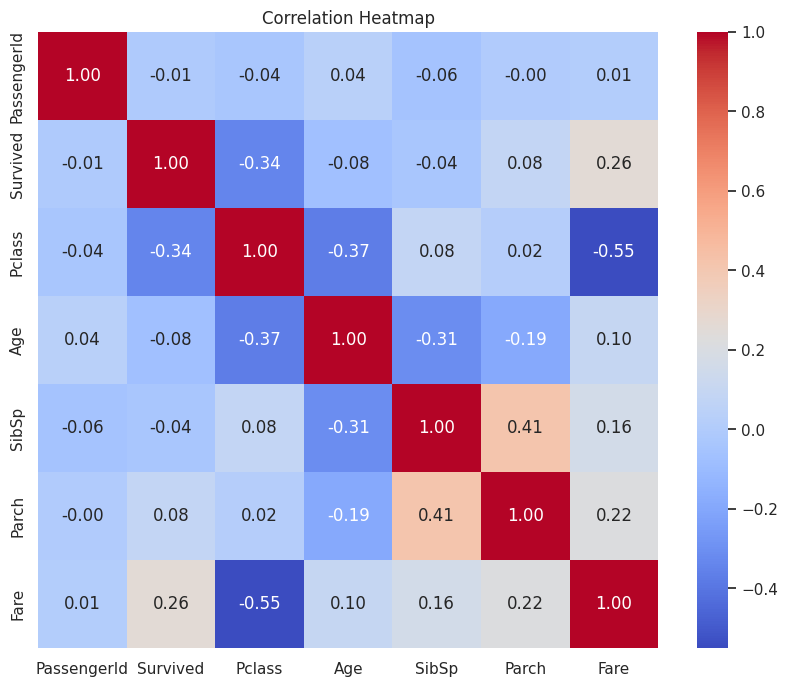

In [2]:
# ==========================
# 4: Exploratory Data Visualization
# ==========================

# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(train["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare Distribution
plt.figure(figsize=(10,5))
sns.histplot(train["Fare"], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

# Sex Count
sns.countplot(data=train, x="Sex")
plt.title("Count by Sex")
plt.show()

# Pclass Count
sns.countplot(data=train, x="Pclass")
plt.title("Passenger Class Count")
plt.show()

# Survival Rate by Sex
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Sex")
plt.show()

# Survival Rate by Class
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()

# KDE Age by Survived
plt.figure(figsize=(10,5))
sns.kdeplot(data=train, x="Age", hue="Survived", fill=True)
plt.title("Age — Survived vs Not Survived")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    train.select_dtypes(include=["int64","float64"]).corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

In [3]:
# ============================================
# 5: Feature Engineering 
# ============================================

df = train.copy()
df_test = test.copy()

# Encode Sex
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df_test["Sex"] = df_test["Sex"].map({"male": 0, "female": 1})

# Fill Embarked + encode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0])

emb_map = {"S":0, "C":1, "Q":2}
df["Embarked"] = df["Embarked"].map(emb_map)
df_test["Embarked"] = df_test["Embarked"].map(emb_map)

# Extract title
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")
df_test["Title"] = df_test["Name"].str.extract(" ([A-Za-z]+)\.")

common_titles = ["Mr", "Miss", "Mrs", "Master"]
df["Title"] = df["Title"].apply(lambda x: x if x in common_titles else "Other")
df_test["Title"] = df_test["Title"].apply(lambda x: x if x in common_titles else "Other")

title_map = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Other":4}
df["Title"] = df["Title"].map(title_map)
df_test["Title"] = df_test["Title"].map(title_map)

# Family size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

# Alone or not
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
df_test["IsAlone"] = (df_test["FamilySize"] == 1).astype(int)

# Ticket group
df["TicketGroup"] = df.groupby("Ticket")["Ticket"].transform("count")
df_test["TicketGroup"] = df_test.groupby("Ticket")["Ticket"].transform("count")

# Cabin letter
df["CabinLetter"] = df["Cabin"].astype(str).str[0].map(
    {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
).fillna(0)

df_test["CabinLetter"] = df_test["Cabin"].astype(str).str[0].map(
    {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
).fillna(0)

# Fill missing Age & Fare
df["Age"] = df["Age"].fillna(df["Age"].median())
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())

df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

# Final features
features = [
    "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare",
    "Embarked", "Title", "FamilySize", "IsAlone",
    "TicketGroup", "CabinLetter"
]

X = df[features]
y = df["Survived"]
X_test = df_test[features]

print("Final Features:", features)
X.head()



Final Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'TicketGroup', 'CabinLetter']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,TicketGroup,CabinLetter
0,3,0,22.0,1,0,7.2500,0,0,2,0,1,0.0
1,1,1,38.0,1,0,71.2833,1,2,2,0,1,3.0
2,3,1,26.0,0,0,7.9250,0,1,1,1,1,0.0
3,1,1,35.0,1,0,53.1000,0,2,2,0,2,3.0
4,3,0,35.0,0,0,8.0500,0,0,1,1,1,0.0



🔹 Logistic Regression AUC: 0.852
🔹 Random Forest AUC: 0.8429
🔹 XGBoost AUC: 0.8294


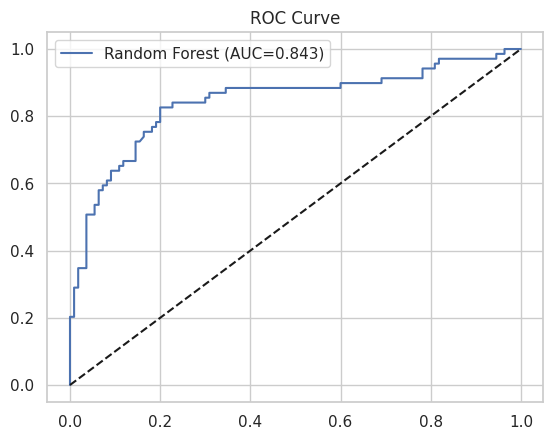

In [4]:
# ============================================
# 6: Model Training & Validation
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_val)
log_auc = roc_auc_score(y_val, logreg.predict_proba(X_val)[:,1])

# Random Forest
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_auc = roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])

# XGBoost
xgb = XGBClassifier(
    n_estimators=350, max_depth=4, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8,
    eval_metric="logloss", random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)
xgb_auc = roc_auc_score(y_val, xgb.predict_proba(X_val)[:,1])

print("\n🔹 Logistic Regression AUC:", round(log_auc,4))
print("🔹 Random Forest AUC:", round(rf_auc,4))
print("🔹 XGBoost AUC:", round(xgb_auc,4))

# Plot ROC
rf_probs = rf.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, rf_probs)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={rf_auc:.3f})")
plt.plot([0,1],[0,1],"k--")
plt.title("ROC Curve")
plt.legend()
plt.show()



In [5]:
# ============================================
# 7: Final Model Training & Submission
# ============================================

best_model = LogisticRegression(max_iter=500)
best_model.fit(X, y)

final_pred = best_model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": final_pred
})

submission.to_csv("submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Conclusion:
Logistic Regression performed the best with the highest AUC, demonstrating good generalization on this dataset.
This model is used for the final submission.